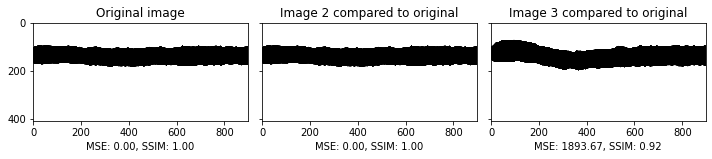

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error


img = cv2.imread('3D_0s.tif',cv2.IMREAD_GRAYSCALE);
img_noise = cv2.imread('3D_0s.tif',cv2.IMREAD_GRAYSCALE);
img_const = cv2.imread('3D_04s.tif',cv2.IMREAD_GRAYSCALE);

#img = ~img
rows, cols = img.shape

#noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
#rng = np.random.default_rng()
#noise[rng.random(size=noise.shape) > 0.5] *= -1



fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mean_squared_error(img, img_noise)
ssim_noise = ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())

mse_const = mean_squared_error(img, img_const)
ssim_const = ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())

label = 'MSE: {:.2f}, SSIM: {:.2f}'

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(mse_none, ssim_none))
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(mse_noise, ssim_noise))
ax[1].set_title('Image 2 compared to original')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(mse_const, ssim_const))
ax[2].set_title('Image 3 compared to original')

plt.tight_layout()
plt.show()

In [ ]:
# 2D MSE: 8207 0.81, 0_4s at 0_8s MSE 20398.23 SSIM 0.62
# 3D MSE: 5644.88 SSIM 0.85 at 0_8s, 1893.67 SSIM 0.92